# <div align="center"> AIRLINE PASSENGER SATISFACTION </div>

## Import Library

In [164]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', 200)

from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

## Read Dataset

In [90]:
#read dataset
df = pd.read_csv('train.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [92]:
#display details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [94]:
#drop 'Unnamed: 0' column because is not necesary
df.drop(['Unnamed: 0'],axis=1)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [96]:
#display the shape of the data
df.shape

(103904, 25)

In [98]:
#describe the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,103904.0,51951.500000,29994.645522,0.0,25975.75,51951.5,77927.25,103903.0
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0


In [100]:
#check for any null values
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [102]:
((df.shape[0] - df.dropna().shape[0]) / df.shape[0]) * 100

0.29835232522328303

In [123]:
#check missing values
def getmissing(df):
    values = {}
    for feat in df.columns:
        if df[feat].isna().any():
            values[feat] = round(df[feat].mean(),2)
    return values

In [125]:
values = getmissing(df)

In [127]:
values

{}

In [129]:
#fill missing value with median 
df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median(),inplace=True)

In [131]:
#checking duplicated data
df.duplicated().sum()

0

In [133]:
#drop 'Unnamed: 0' column and id colums because is not necesary
df1 = df.drop(columns = ['Unnamed: 0','id'])

In [135]:
df1.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


## Data Understanding 

In [150]:
categorical = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']
numerical = ['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location',
              'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service',
              'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 
              'Departure Delay in Minutes', 'Arrival Delay in Minutes']

In [152]:
#show statistic of numerical column
df1[numerical].describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.133392
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.649776
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [154]:
#show statistical summary for categorical column
df1[categorical].describe()

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879


In [156]:
df['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [158]:
# Indicates the exact number of values
# this code is very useful because it has multiple categorical columns
for col in categorical:
    print (f'Value counts of {col} column')
    print(df[col].value_counts(), '\n')

Value counts of Gender column
Gender
Female    52727
Male      51177
Name: count, dtype: int64 

Value counts of Customer Type column
Customer Type
Loyal Customer       84923
disloyal Customer    18981
Name: count, dtype: int64 

Value counts of Type of Travel column
Type of Travel
Business travel    71655
Personal Travel    32249
Name: count, dtype: int64 

Value counts of Class column
Class
Business    49665
Eco         46745
Eco Plus     7494
Name: count, dtype: int64 

Value counts of satisfaction column
satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64 



## Univariate Analysis :

### Numeric Column ###

### (1). Show Outliers with Boxplot ###

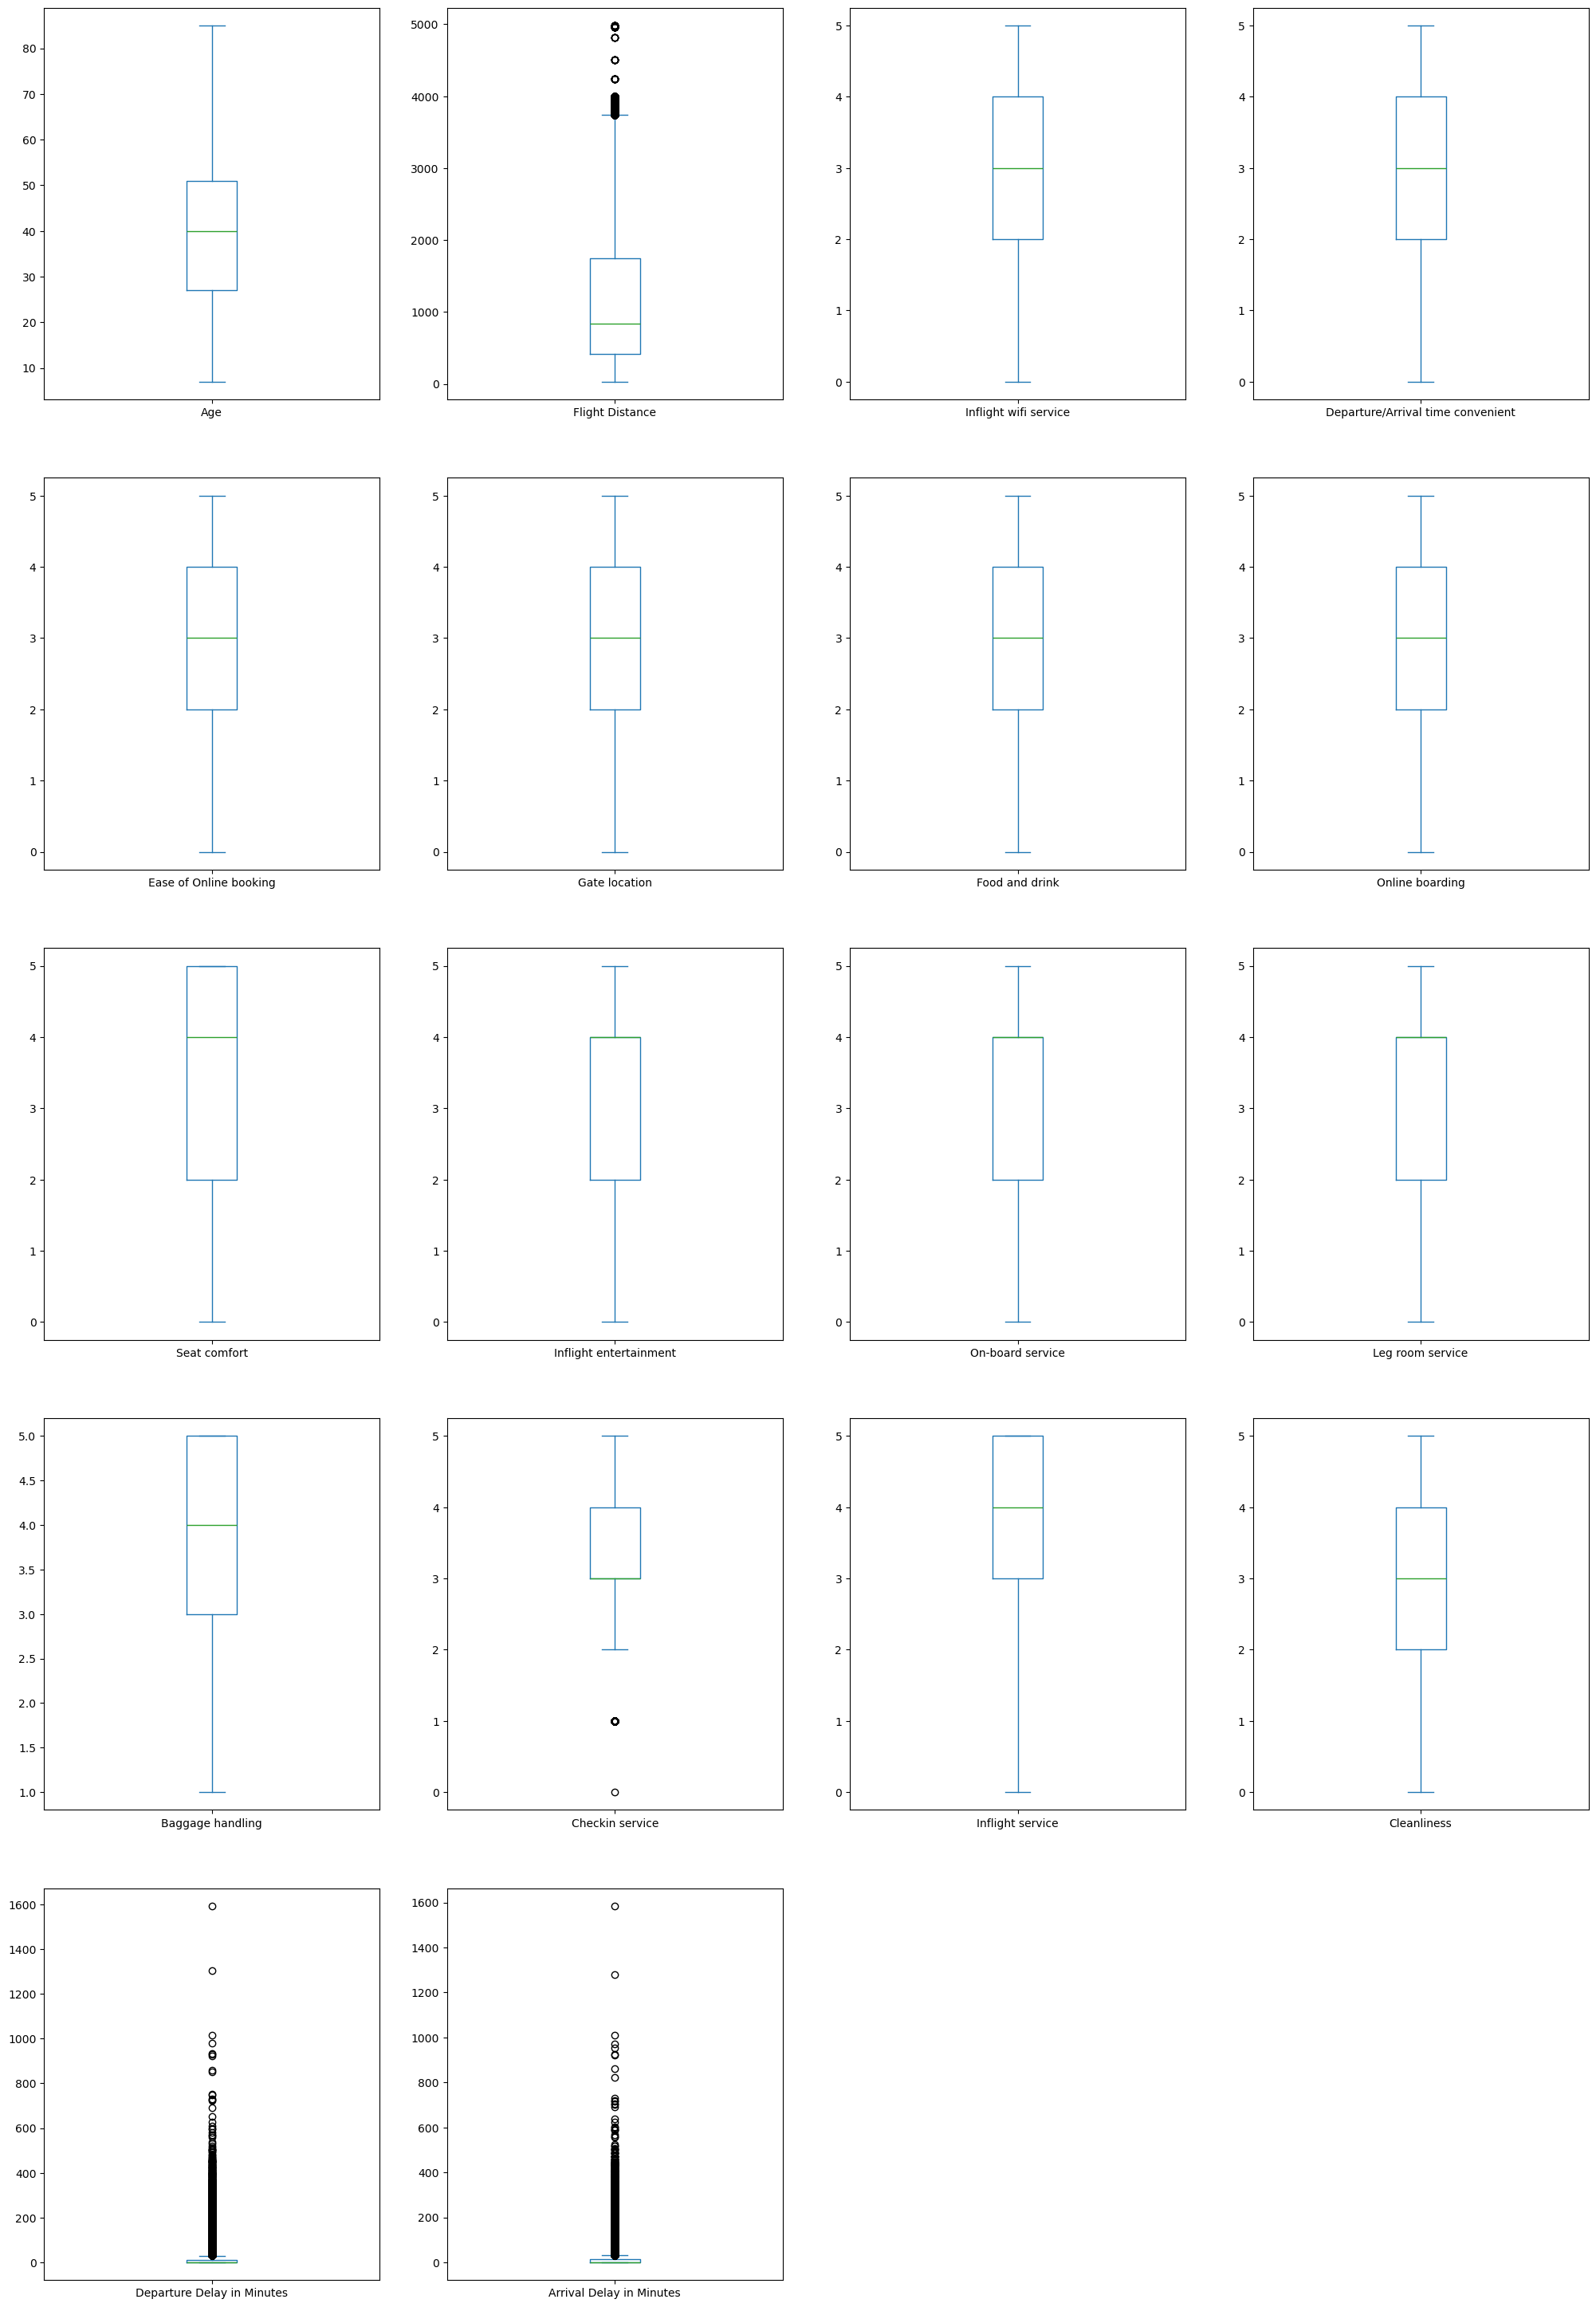

In [180]:
# Create the box plot with subplots and layout
df1.plot(kind='box', subplots=True, layout=(8, 4), figsize=(25, 60))

# Display the plot
plt.show()

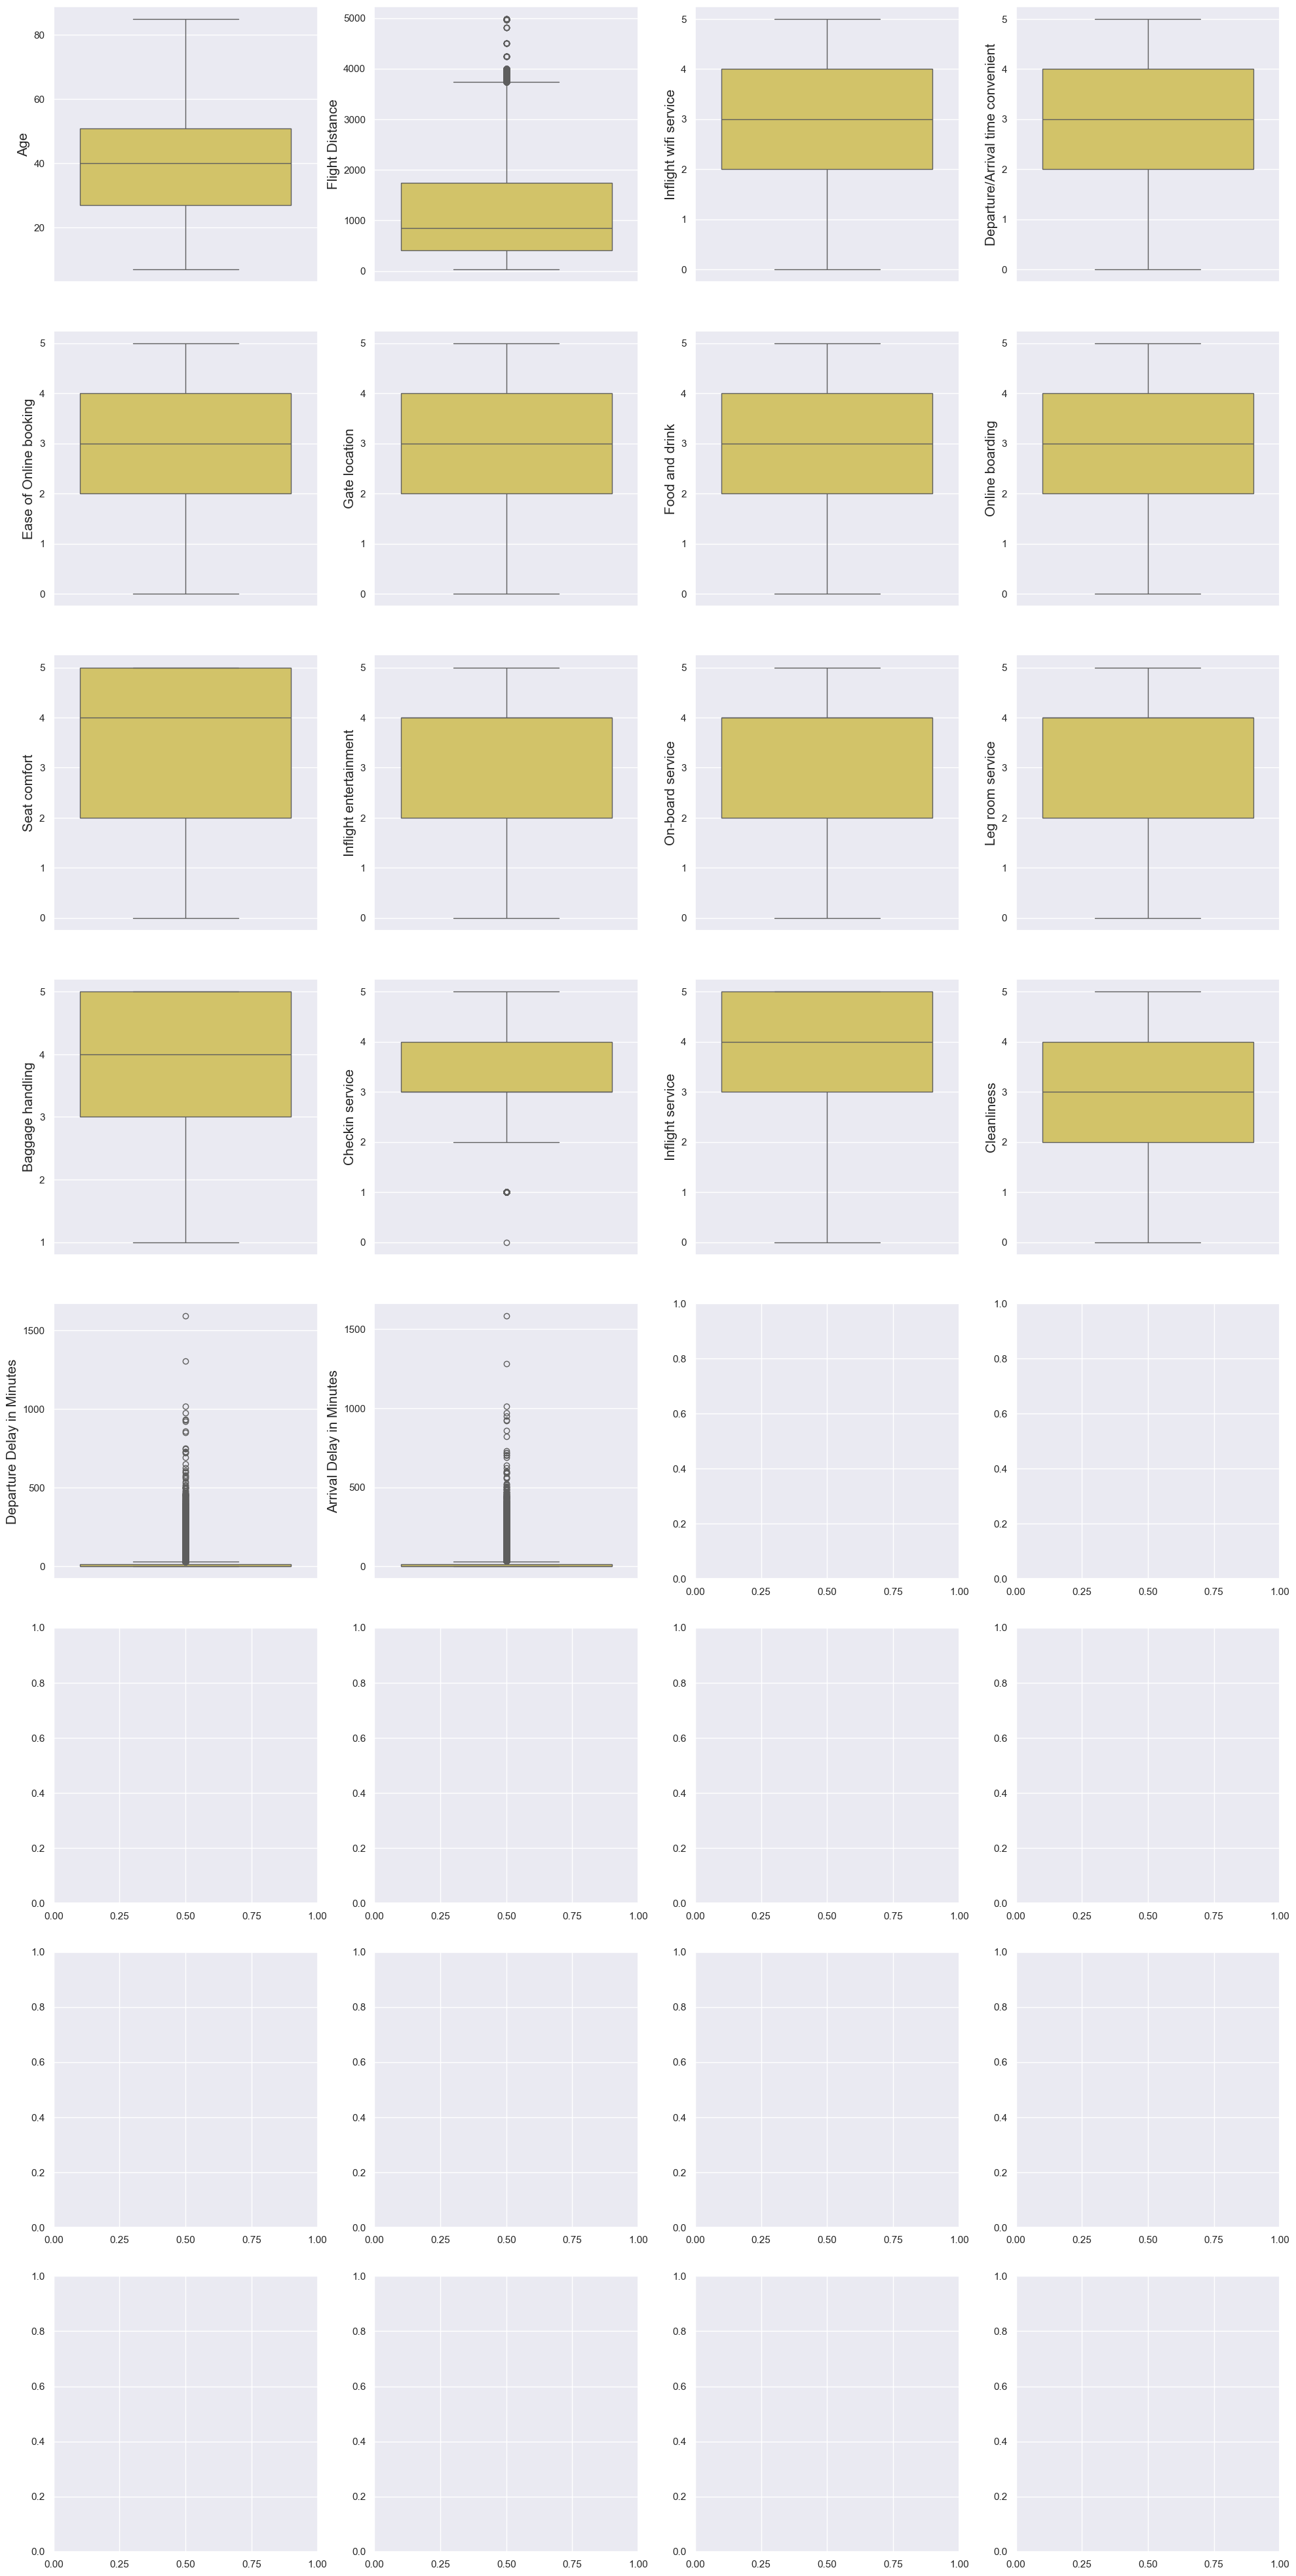

In [190]:
sns.set(rc={
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":15},
             style="darkgrid",
            )

fig, axs = plt.subplots(8, 4, figsize=(20,40))
fig.tight_layout(pad=3.0)

for f,ax in zip(numerical,axs.ravel()):
    sns.set(font_scale = 2)
    ax=sns.boxplot(ax=ax,data=df1,y=df1[f],color='#E3CF57')

In [192]:
# show the profile of outlier 1
outlier1 = df1['Flight Distance'].max()

df1[df1['Flight Distance'] == outlier1]

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
2847,Female,Loyal Customer,63,Personal Travel,Business,4983,0,5,0,2,0,5,1,3,2,4,3,1,5,1,3,0.0,satisfied
18434,Female,Loyal Customer,31,Business travel,Eco,4983,4,3,3,3,4,4,4,3,2,5,2,4,1,4,18,0.0,satisfied
19755,Female,Loyal Customer,50,Business travel,Business,4983,5,4,5,5,5,1,5,3,2,4,3,5,5,5,0,0.0,satisfied
33094,Female,Loyal Customer,29,Personal Travel,Eco,4983,2,4,2,5,2,4,4,2,2,4,4,4,3,4,6,0.0,neutral or dissatisfied
46848,Male,Loyal Customer,42,Business travel,Business,4983,3,3,3,3,5,4,4,4,5,4,3,4,2,4,0,0.0,satisfied
64631,Female,Loyal Customer,52,Business travel,Business,4983,3,5,5,5,3,3,3,3,3,3,5,3,2,3,16,0.0,satisfied
64791,Female,Loyal Customer,50,Business travel,Business,4983,4,4,4,4,4,4,4,2,2,4,4,4,3,4,0,0.0,satisfied
67767,Male,Loyal Customer,67,Personal Travel,Eco Plus,4983,5,5,5,4,5,1,1,1,3,5,5,1,3,1,0,0.0,satisfied
74837,Female,Loyal Customer,37,Business travel,Business,4983,2,3,2,2,4,4,4,3,1,5,1,4,3,4,0,2.0,satisfied
79574,Male,Loyal Customer,38,Business travel,Eco Plus,4983,4,4,4,4,4,4,4,3,4,3,5,4,5,4,2,0.0,satisfied


In [204]:
# Show the profile of outlier 2
outlier2 = df1['Departure Delay in Minutes'].max()

df1[df1['Departure Delay in Minutes'] == outlier2]

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
83741,Female,Loyal Customer,47,Personal Travel,Eco,1120,2,2,2,3,2,4,2,2,4,4,4,2,3,2,1592,1584.0,neutral or dissatisfied


In [200]:
# Show the profile of outlier 3
outlier3 = df1['Arrival Delay in Minutes'].max()

df1[df1['Arrival Delay in Minutes'] == outlier3]

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
83741,Female,Loyal Customer,47,Personal Travel,Eco,1120,2,2,2,3,2,4,2,2,4,4,4,2,3,2,1592,1584.0,neutral or dissatisfied


In [206]:
# Show the profile of outlier 4
outlier4 = df1['Checkin service'].min()

df1[df1['Checkin service'] == outlier4]

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
6580,Female,Loyal Customer,44,Business travel,Business,214,4,5,5,5,1,4,0,4,4,3,3,0,1,0,200,233.0,neutral or dissatisfied


In [208]:
df1['Checkin service'].unique()

array([4, 1, 3, 5, 2, 0], dtype=int64)

In [210]:
df1['Gender'].unique()

array(['Male', 'Female'], dtype=object)